# Integrantes:
- Jorge Eduardo Rodriguez Cardozo - 200711501
- German Augusto Carvajal Murcia -  201313516

# Exercise 01.1

Create a function that receives two inputs a and b, and returns the product of the a decimal of pi and the b decimal of pi.

```
i.e, 
pi = 3.14159
if a = 2 and b = 4
result = 4 * 5
result = 20
```

Caveats:
- a and b are between 1 and 15
- decimals positions 1 and 2 are 1 and 4, respectively. (remember that python start indexing in 0)

In [1]:
from math import pi
def mult_dec_pi(a, b):
    # Add the solution here
    if a>=1 and a<=15 and b>=1 and b<=15:
        result = int(str(pi)[a+1])*int(str(pi)[b+1])
    else:
        result='Error'
    return result

In [2]:
mult_dec_pi(a=2, b=4)
# 20.0

20

In [3]:
mult_dec_pi(a=5, b=10)
# 45.0

45

In [4]:
mult_dec_pi(a=14, b=1)
# 9.0

9

In [5]:
mult_dec_pi(a=6, b=8)
# 10.0

10

In [6]:
# Bonus
mult_dec_pi(a=16, b=4)
# 'Error'

'Error'

# Exercise 01.2

Using the given dataset. Estimate a linear regression between Employed and GNP.

$$Employed = b_0 + b_1 * GNP $$

$$\hat b = (X^TX)^{-1}X^TY$$
$$Y = Employed$$
$$X = [1  \quad GNP]$$

Text(0,0.5,'Employed')

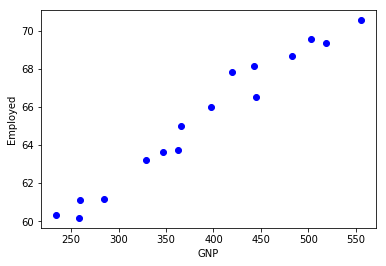

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Import data
raw_data = """
Year,Employed,GNP
1947,60.323,234.289
1948,61.122,259.426
1949,60.171,258.054
1950,61.187,284.599
1951,63.221,328.975
1952,63.639,346.999
1953,64.989,365.385
1954,63.761,363.112
1955,66.019,397.469
1956,67.857,419.18
1957,68.169,442.769
1958,66.513,444.546
1959,68.655,482.704
1960,69.564,502.601
1961,69.331,518.173
1962,70.551,554.894"""

data = []
for line in raw_data.splitlines()[2:]:
    words = line.split(',')
    data.append(words)
data = np.array(data, dtype=np.float)
n_obs = data.shape[0]
plt.plot(data[:, 2], data[:, 1], 'bo')
plt.xlabel("GNP")
plt.ylabel("Employed")

In [8]:
X=np.matrix(np.hstack((np.ones((16,1)),data[:,2].reshape(16,1))))
Y=np.matrix(data[:,1].reshape(16,1))
beta=np.linalg.inv(np.transpose(X)*X)*(np.transpose(X)*Y)
print(beta)

[[5.18435898e+01]
 [3.47522943e-02]]


# Exercise 01.3

Analyze the baby names dataset using pandas

In [10]:
import pandas as pd
# Load dataset
import zipfile
with zipfile.ZipFile('/Users/germancarvajal/Dropbox/Universidad-201818/Deep_learning_y_redes_neuronales/AppliedDeepLearningClass-master/datasets/baby-names2.csv.zip', 'r') as z:
    f = z.open('baby-names2.csv')
    names = pd.io.parsers.read_table(f, sep=',')

In [11]:
names.head()

,year,name,prop,sex,soundex
0,1880,John,0.081541,boy,J500
1,1880,William,0.080511,boy,W450
2,1880,James,0.050057,boy,J520
3,1880,Charles,0.045167,boy,C642
4,1880,George,0.043292,boy,G620


In [12]:
names[names.year == 1993].head()

,year,name,prop,sex,soundex
113000,1993,Michael,0.024010,boy,M240
113001,1993,Christopher,0.018572,boy,C623
113002,1993,Matthew,0.017332,boy,M300
113003,1993,Joshua,0.016268,boy,J200
113004,1993,Tyler,0.014439,boy,T460


### segment the data into boy and girl names

In [13]:
boys = names[names.sex == 'boy'].copy()
girls = names[names.sex == 'girl'].copy()

### Analyzing the popularity of a name over time

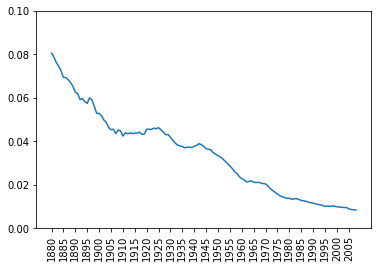

In [14]:
william = boys[boys['name']=='William']
plt.plot(range(william.shape[0]), william['prop'])
plt.xticks(range(william.shape[0])[::5], william['year'].values[::5], rotation='vertical')
plt.ylim([0, 0.1])
plt.show()

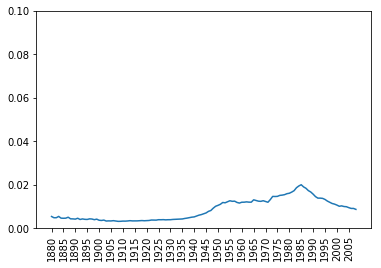

In [15]:
Daniel = boys[boys['name']=='Daniel']

plt.plot(range(Daniel.shape[0]), Daniel['prop'])
plt.xticks(range(Daniel.shape[0])[::5], Daniel['year'].values[::5], rotation='vertical')
plt.ylim([0, 0.1])
plt.show()

# Exercise 01.3

Which has been the most popular boy name every decade?

In [16]:
import math
boys['decade']=pd.cut(boys['year'].values,range(math.floor(min(boys['year'])/10)*10,math.ceil(max(boys['year'])/10)*10+10,10),False)
boys[boys.groupby(by=['decade'])['prop'].transform(max)==boys['prop']][['decade','name']]

,decade,name
0,"[1880, 1890)",John
10000,"[1890, 1900)",John
20000,"[1900, 1910)",John
31000,"[1910, 1920)",John
49000,"[1920, 1930)",Robert
51000,"[1930, 1940)",Robert
64000,"[1940, 1950)",James
70000,"[1950, 1960)",James
89000,"[1960, 1970)",Michael
90000,"[1970, 1980)",Michael


# Exercise 01.4

Which has been the most popular girl name?

**Solution assumption: popularity is measured as the average observed proportion of births over the years for each name. When there is no registered births under a name in a year, the proportion is supposed to be 0 in that particular year.**

In [309]:
h=girls.pivot(index='name',columns='year',values='prop').fillna(0).mean(axis=1).reset_index()
h[h[0]==max(h[0])][['name']]

,name
2729,Mary


# Exercise 01.5

What is the most popular new girl name? (new is a name that appears only in the 2000's)

**Solution assumption: popularity is measured as the average observed proportion of births over the years for each name. When there is no registered births under a name in a year, the proportion is supposed to be 0 in that particular year.**

In [310]:
new=pd.merge(girls[girls['year']>=2000],girls[girls['year']<2000], on='name',how='left')
new=new[pd.isnull(new['year_y'])]
h=new.pivot(index='name',columns='year_x',values='prop_x').fillna(0).mean(axis=1).reset_index()
h[h[0]==max(h[0])][['name']]

,name
203,Nevaeh
